<a href="https://colab.research.google.com/github/Satishpasam1/FMML-22B21A4348/blob/main/Module_01_Lab_01_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracting features from data

FMML Module 1, Lab 1<br>



In [ ]:
! pip install wikipedia

import wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=bb1d04d8a5a057350188fe94bed589f503315ef022b60ee0549d164b6abdc0f3
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


# Part 1: Features of text
How do we apply machine learning on text? We can't directly use the text as input to our algorithms. We need to convert them to features. In this notebook, we will explore a simple way of converting text to features.

Let us download a few documents off Wikipedia.

In [ ]:
topic1 = 'Giraffe'
topic2 = 'Elephant'

wikipedia.set_lang('en')

eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content

wikipedia.set_lang('fr')

fr1 = wikipedia.page(topic1).content
fr2 = wikipedia.page(topic2).content

This is what the text looks like:

In [ ]:
fr2

'Les éléphants sont des mammifères proboscidiens de la famille des Éléphantidés. Ils correspondent aujourd\'hui à trois espèces réparties en deux genres distincts. L\'éléphant de savane d\'Afrique et l\'éléphant de forêt d\'Afrique, autrefois regroupés sous la même espèce d\'« éléphant d\'Afrique », appartiennent au genre Loxodonta, tandis que l\'éléphant d\'Asie, anciennement appelé « éléphant indien », appartient au genre Elephas. Ils se différencient par certaines caractéristiques anatomiques, les éléphants d\'Asie étant en général plus petits avec des oreilles plus petites, ou encore une différence du bout de la trompe. Ces espèces survivantes font localement l\'objet de programmes ou de projets de réintroduction et de protection.\nLe mot français « éléphant » vient du mot latin elephantus qui tire son origine du grec ἐλέφας / eléphas, « ivoire » ou « éléphant ».\nL\'éléphant apparait dans de nombreuses cultures. Il est symbole de sagesse dans la culture asiatique, connu pour sa mé

We need to clean this up a bit. Let us remove all the special characters and keep only 26 letters and space. Note that this will remove accented characters in French also. We are also removing all the numbers and spaces. So this is not an ideal solution.

In [ ]:
def cleanup(text):
  text = text.lower()  # make it lowercase
  text = re.sub('[^a-z]+', '', text) # only keep characters
  return text

In [ ]:
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
fr1 = cleanup(fr1)
fr2 = cleanup(fr2)

In [ ]:
print(eng1)

thegiraffeisalargeafricanhoofedmammalbelongingtothegenusgiraffaitisthetallestlivingterrestrialanimalandthelargestruminantonearthtraditionallygiraffeswerethoughttobeonespeciesgiraffacamelopardaliswithninesubspeciesmostrecentlyresearchersproposeddividingthemintouptoeightextantspeciesduetonewresearchintotheirmitochondrialandnucleardnaaswellasmorphologicalmeasurementssevenotherextinctspeciesofgiraffaareknownfromthefossilrecordthegiraffeschiefdistinguishingcharacteristicsareitsextremelylongneckandlegsitshornlikeossiconesanditsspottedcoatpatternsitisclassifiedunderthefamilygiraffidaealongwithitsclosestextantrelativetheokapiitsscatteredrangeextendsfromchadinthenorthtosouthafricainthesouthandfromnigerinthewesttosomaliaintheeastgiraffesusuallyinhabitsavannahsandwoodlandstheirfoodsourceisleavesfruitsandflowersofwoodyplantsprimarilyacaciaspecieswhichtheybrowseatheightsmostotherherbivorescannotreachlionsleopardsspottedhyenasandafricanwilddogsmaypreyupongiraffesgiraffesliveinherdsofrelatedfemalesan

Now let us calculate the frequency of the character n-grams. N-grams are groups of characters of size n. A unigram is a single character and a bigram is a group of two characters and so on.

Let us count the frequency of each character in a text and plot it in a histogram.

In [ ]:
# convert a tuple of characters to a string
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

# convert a tuple of tuples to a list of strings
def key2string(keys):
  return [tuple2string(i) for i in keys]

# plot the histogram
def plothistogram(ngram):
  keys = key2string(ngram.keys())
  values = list(ngram.values())

  # sort the keys in alphabetic order
  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

Let us compare the histograms of English pages and French pages. Can you spot a difference?

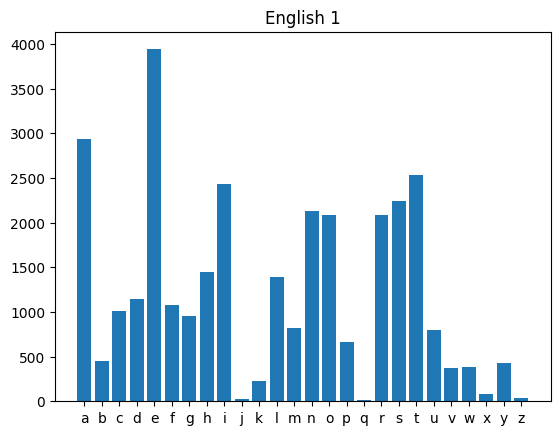

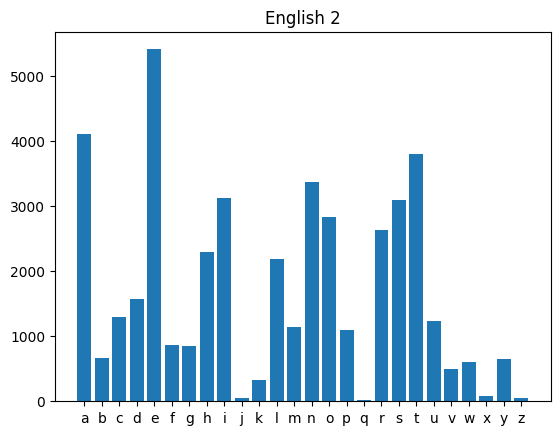

In [ ]:
unigram_eng1 = Counter(ngrams(eng1,1))
plothistogram(unigram_eng1)
plt.title('English 1')
plt.show()
unigram_eng2 = Counter(ngrams(eng2,1))
plothistogram(unigram_eng2)
plt.title('English 2')
plt.show()

In [ ]:
unigram_fr1 = Counter(ngrams(fr1,1))
plothistogram(unigram_eng1)
plt.title('French 1')
plt.show()
unigram_fr2 = Counter(ngrams(fr2,1))
plothistogram(unigram_fr2)
plt.title('French 2')
plt.show()

We can see that the unigrams for French and English are very similar. So this is not a good feature if we want to distinguish between English and French. Let us look at bigrams.

In [ ]:
bigram_eng1 = Counter(ngrams(eng1,2)) # bigrams
plothistogram(bigram_eng1)
plt.title('English 1')
plt.show()

bigram_eng2 = Counter(ngrams(eng2,2))
plothistogram(bigram_eng2)
plt.title('English 2')
plt.show()

bigram_fr1 = Counter(ngrams(fr1,2))
plothistogram(bigram_eng1)
plt.title('French 1')
plt.show()

bigram_fr2 = Counter(ngrams(fr2,2))
plothistogram(bigram_fr2)
plt.title('French 2')
plt.show()

Another way to visualize bigrams is to use a 2-dimensional graph.

In [ ]:
def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))]
  plt.imshow(freq, cmap = 'jet')
  return freq

In [ ]:
bieng1 = plotbihistogram(bigram_eng1)
plt.show()
bieng2 = plotbihistogram(bigram_eng2)

In [ ]:
bifr1 = plotbihistogram(bigram_fr1)
plt.show()
bifr2 = plotbihistogram(bigram_fr2)

Let us look at the top 10 ngrams for each text.

In [ ]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')

In [ ]:
print('\nEnglish 1:')
ShowTopN(bieng1)
print('\nEnglish 2:')
ShowTopN(bieng2)
print('\nFrench 1:')
ShowTopN(bifr1)
print('\nFrench 2:')
ShowTopN(bifr2)

We observe that the bigrams are similar across different topics but different across languages. Thus, the bigram frequency is a good feature for distinguishing languages, but not for distinguishing topics.

Thus, we were able to convert a many-dimensional input (the text) to 26 dimesions (unigrams) or 26*26 dimensions (bigrams).


A few ways to explore:
1. Try with different languages.
2. The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? What if we use text from another source than Wikipedia?
3. How can we use and visualize trigrams and higher n-grams?

# Part 2: Written numbers

We will use a subset of the MNIST dataset. Each input character is represented in a 28*28 array. Let us see if we can extract some simple features from these images which can help us distinguish between the digits.

Load the dataset:

In [ ]:
from keras.datasets import mnist

#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

Extract a subset of the data for our experiment:

In [ ]:
no1 = train_X[train_y==1,:,:]
no0 = train_X[train_y==0,:,:]

Let us visualize a few images here:

In [ ]:
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no0[ii,:,:])
plt.show()

suNow, let us start with a simple feature: the sum of all pixels and see how good this feature is.

In [ ]:
sum1 = np.sum(no1>0, (1,2)) # threshold before adding up
sum0 = np.sum(no0>0, (1,2))

Let us visualize how good this feature is: (X-axis is mean, y-axis is the digit)

In [ ]:
plt.hist(sum1, alpha=0.7);
plt.hist(sum0, alpha=0.7);

We can already see that this feature separates the two classes quite well.

Let us look at another, more complicated feature. We will count the number black pixels that are surrounded on four sides by non-black pixels, or "hole pixels".

In [ ]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]  # for every row, add up all the rows above it.
  img2 = img2>0
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
  return hole

Visualize a few:

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Now let us plot the number of hole pixels and see how this feature behaves

In [ ]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])

plt.hist(hole1, alpha=0.7);
plt.hist(hole0, alpha=0.7);

This feature works even better to distinguish between one and zero.


Now let us try the number of pixels in the 'hull' or the number with the holes filled in:

In [ ]:
def getHullPixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  return hull

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHullPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Plotting the number of hull pixels versus the digit:

In [ ]:
hull1 = np.array([getHullPixels(i).sum() for i in no1])
hull0 = np.array([getHullPixels(i).sum() for i in no0])

plt.hist(hull1, alpha=0.7);
plt.hist(hull0, alpha=0.7);

Let us try one more feature, where we look at the number of boundary pixels in each image.

In [ ]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

In [ ]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0= np.array([getBoundaryPixels(i).sum() for i in no0])

plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);

What will happen if we plot two features together?

In [ ]:
# Sum and hull
plt.scatter(sum0, hull0, alpha=0.1)
plt.scatter(sum1, hull1, alpha=0.1)
plt.xlabel('Sum')
plt.ylabel('Hull')
plt.legend(['0','1'])
plt.show()

# Sum and hole
plt.scatter(sum0, hole0, alpha=0.1)
plt.scatter(sum1, hole1, alpha=0.1)
plt.xlabel('Sum');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

# Hole and boundary
plt.scatter(bound0, hole0, alpha=0.1)
plt.scatter(bound1, hole1, alpha=0.1)
plt.xlabel('Boundary');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

Now let us try plotting 3 features together.

In [ ]:
cl1 = ['class 1']*len(sum1)
cl0 = ['class 0']*len(sum0)
df = pd.DataFrame(list(zip(np.concatenate((hole0, hole0)), np.concatenate((sum1,sum0)),
                           np.concatenate((bound1,bound0)), np.concatenate((cl1, cl0)))),
               columns =['Hole', 'Sum', 'Boundary', 'Class'])
df.head()
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', opacity=0.1)
fig.show()

Feel free to explore the above graph with your mouse.


We have seen that we extracted four features from a 28*28 dimensional image.


Some questions to explore:
1. Which is the best combination of features?
2. How would you test or visualize four or more features?
3. Can you come up with your own features?
4. Will these features work for different classes other than 0 and 1?
5. What will happen if we take more that two classes at a time?

# 1. which is the best combination of features ?
When you work with more than two classes (i.e., multi-class classification) in Python, the way you approach and model the problem can vary depending on the machine learning framework or library you are using. Python provides several libraries and tools for multi-class classification, including scikit-learn, TensorFlow, PyTorch, and others. Here's a general overview of what happens when you work with multi-class classification in Python:

1. *Data Preparation*:
   - You'll typically have a dataset where each data point belongs to one of several distinct classes or categories. These classes can be represented as integers (e.g., 0, 1, 2, ...) or as class labels (e.g., "cat," "dog," "bird," ...).

2. *Model Selection*:
   - You'll choose a machine learning model or algorithm suitable for multi-class classification. Many classifiers inherently support multi-class problems, including decision trees, random forests, support vector machines, k-nearest neighbors, and neural networks.

3. *Model Training*:
   - You'll split your dataset into training and testing sets (and possibly validation sets), and you'll train the chosen model on the training data. The model will learn to distinguish between the multiple classes during training.

4. *Prediction*:
   - After training, you can use the trained model to make predictions on new, unseen data. The model will assign one of the multiple classes to each data point based on its learned patterns and features.

5. *Evaluation*:
   - You'll evaluate the model's performance using metrics appropriate for multi-class classification, such as accuracy, precision, recall, F1-score, confusion matrix, or log-loss (cross-entropy loss).

6. *Visualization*:
   - Depending on the number of classes and features, you may use various visualization techniques to understand the model's performance and the distribution of data points across classes. Techniques like confusion matrices and class-wise performance metrics can help assess the model's strengths and weaknesses.

Here's an example of using scikit-learn for multi-class classification with a decision tree classifier:

python
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the Iris dataset (a common multi-class classification dataset)
data = load_iris()
X, y = data.data, data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier and train it
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


In this example, the Iris dataset is used, which contains three classes (setosa, versicolor, and virginica). The decision tree classifier is trained to classify data points into these three classes, and the model's performance is evaluated using accuracy and a classification report

#***2.How would you test or visualize four or more features?***

When working with datasets that have four or more features, it becomes essential to employ various techniques to test and visualize the data effectively. Here are some common methods for testing and visualizing datasets with multiple features in Python:

*Pair Plots (Pairplot):*

Pair plots are an excellent way to visualize pairwise relationships between features in a dataset. You can use libraries like Seaborn to create pair plots that display scatterplots for numerical features and histograms for the diagonal entries (univariate distributions).

##python code
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue="target_variable")
plt.show()

*Correlation Matrix:*

Calculating and visualizing the correlation matrix can help you understand the relationships between features. You can use a heatmap to display the correlation values.

python code
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

*3D Scatter Plots:*

If you have four numerical features, you can create 3D scatter plots to visualize the relationships between three of them while color-coding the points based on the fourth feature.

python code
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['feature1'], df['feature2'], df['feature3'], c=df['feature4'])
plt.show()

*Parallel Coordinates:*

Parallel coordinates plots are useful for visualizing high-dimensional data. You can use the Pandas parallel_coordinates function for this purpose.

python code
from pandas.plotting import parallel_coordinates

parallel_coordinates(df, 'target_variable')
plt.show()
Dimensionality Reduction:
Techniques like Principal Component Analysis (PCA) or t-Distributed Stochastic Neighbor Embedding (t-SNE) can reduce the dimensionality of your data and allow you to visualize it in lower-dimensional spaces while preserving important relationships.

python
Copy code
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(df)
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=df['target_variable'])
plt.show()
Interactive Visualization:
Consider using libraries like Plotly or Bokeh for interactive data exploration, which allows you to create interactive visualizations like scatter plots, histograms, and more with tooltips and zooming capabilities.

python code
import plotly.express as px

fig = px.scatter_3d(df, x='feature1', y='feature2', z='feature3', color='feature4')
fig.show()

*Statistical Tests:*

To test the relationships between features, you can perform statistical tests like ANOVA, Chi-squared test, or regression analysis depending on your data types (numerical or categorical).

These methods provide different ways to explore and visualize datasets with four or more features, helping you gain insights into the data's structure, relationships, and potential patterns. The choice of visualization technique will depend on the nature of your data and your specific analysis goals.

#3.Can you come up with your own features?
Yes, you can certainly create your own features in Python when working with data or developing applications. Creating custom features often involves manipulating existing data or adding new attributes to your objects or datasets to better suit your needs. Here are some examples of how you can create your own features in Python:

*Derived Features:*

You can create new features by performing operations on existing features. For example, if you have a dataset with a "price" and "quantity" feature, you can create a new feature "total_cost" by multiplying these two features.

python code
df['total_cost'] = df['price'] * df['quantity']
*Text Features:*
If you're working with text data, you can create features like word counts, character counts, or sentiment scores from the text content.

python code
df['word_count'] = df['text_column'].apply(lambda x: len(x.split()))

*Date Features:*

When dealing with date-time data, you can create features like day of the week, month, or year from a date column.

python code
df['day_of_week'] = df['date_column'].dt.dayofweek

*Categorical Features:*

You can convert categorical features into numerical representations using techniques like one-hot encoding or label encoding.

python code
df = pd.get_dummies(df, columns=['category'])

*Aggregated Features:*

You can create features by aggregating data. For example, calculate the mean, sum, or max of a numerical feature for a group of data points.

python code
mean_sales_by_category = df.groupby('category')['sales'].mean()
df['mean_sales_by_category'] = df['category'].map(mean_sales_by_category)

*Custom Functions:*

You can define custom functions to create features based on complex logic. For instance, you can create a feature that checks if a text column contains certain keywords.

python code
def contains_keyword(text):
    keywords = ['important', 'urgent']
    return any(keyword in text for keyword in keywords)

df['contains_keyword'] = df['text_column'].apply(contains_keyword)

*Feature Engineering:*

In machine learning, feature engineering involves creating new features to improve model performance. This can include polynomial features, interaction terms, or transformation of existing features.

python code
from  preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

*Geospatial Features:*

If you're working with geospatial data, you can create features like distances between points, cluster labels, or regions based on coordinates.

python code
from geopy.distance import great_circle

df['distance_to_city_center'] = df.apply(lambda row: great_circle((row['latitude'], row['longitude']), city_center).miles, axis=1)
Remember that the creation of custom features should be driven by your understanding of the data and the problem you're trying to solve. Feature engineering is often an iterative process, and it's essential to validate and test the impact of new features on your analysis or machine learning models.

#**4.Will these features work for different classes other than 0 and 1?**

The features I mentioned in my previous response can certainly be used for different classes other than just binary classes 0 and 1. In fact, these feature creation techniques are generally applicable to a wide range of classification and regression problems where the target variable can take on multiple classes or continuous values.

#Here's how these features can work for different classes:

*Derived Features:*

Features created by performing operations on existing features are not limited to binary classes. You can create derived features that capture relationships between variables for multi-class or regression problems.

*Text Features:*

Count-based features like word counts or sentiment scores can be useful for sentiment analysis, topic modeling, or any text-based classification problem, regardless of the number of classes.

*Date Features:*

Date-related features like day of the week, month, or year can be relevant for various classification tasks or regression problems, such as predicting sales for multiple products or forecasting demand over time.

*Categorical Features:*

One-hot encoding or label encoding can be applied to categorical features with multiple classes, allowing you to represent and work with categorical data effectively.

*Aggregated Features:*

Aggregated features can summarize data for different categories or groups, making them suitable for multi-class problems where you want to understand patterns within each class.

*Custom Functions:*

Custom functions for feature creation can be adapted to handle multi-class scenarios by considering class-specific logic or patterns within the data.

*Feature Engineering:*
Techniques like polynomial features, interaction terms, or feature transformations can be applied to multi-class or regression problems to capture complex relationships between variables.

*Geospatial Features:*

Geospatial features, such as distances between points or cluster labels, can be relevant for location-based classification tasks, such as categorizing points of interest into multiple classes.

The features and feature engineering techniques mentioned earlier are versatile and can be used in a wide range of machine learning and data analysis tasks, including those with multiple classes or regression targets. The key is to adapt these techniques to the specific requirements and characteristics of your problem and dataset

#**5.What will happen if we take more that two classes at a time?**
When you work with more than two classes (i.e., multi-class classification) in Python, the way you approach and model the problem can vary depending on the machine learning framework or library you are using. Python provides several libraries and tools for multi-class classification, including scikit-learn, TensorFlow, PyTorch, and others. Here's a general overview of what happens when you work with multi-class classification in Python:

1. *Data Preparation*:

    You'll typically have a dataset where each data point belongs to one of several distinct classes or categories. These classes can be represented as integers (e.g., 0, 1, 2, ...) or as class labels (e.g., "cat," "dog," "bird," ...).

2. *Model Selection*:

   You'll choose a machine learning model or algorithm suitable for multi-class classification. Many classifiers inherently support multi-class problems, including decision trees, random forests, support vector machines, k-nearest neighbors, and neural networks.

3. *Model Training*:
    You'll split your dataset into training and testing sets (and possibly validation sets), and you'll train the chosen model on the training data. The model will learn to distinguish between the multiple classes during training.

4. *Prediction*:
    After training, you can use the trained model to make predictions on new, unseen data. The model will assign one of the multiple classes to each data point based on its learned patterns and features.

5. *Evaluation*:
    You'll evaluate the model's performance using metrics appropriate for multi-class classification, such as accuracy, precision, recall, F1-score, confusion matrix, or log-loss (cross-entropy loss).

6. *Visualization*:
    Depending on the number of classes and features, you may use various visualization techniques to understand the model's performance and the distribution of data points across classes. Techniques like confusion matrices and class-wise performance metrics can help assess the model's strengths and weaknesses.

Here's an example of using scikit-learn for multi-class classification with a decision tree classifier:


***from sklearn.datasets import load_iris
   from sklearn.model_selection import train_test_split
   from sklearn.tree import DecisionTreeClassifier
   from sklearn.metrics import accuracy_score, classification_report***

# Load the Iris dataset (a common multi-class classification dataset)
data = load_iris()
X, y = data.data, data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier and train it
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)
```

In this example, the Iris dataset is used, which contains three classes (setosa, versicolor, and virginica). The decision tree classifier is trained to classify data points into these three classes, and the model's performance is evaluated using accuracy and a classification report.